# Regresión Lineal I.

## Ecuaciones normales.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os


### Relación entre Tamaño de Casas y Valor de Mercado

Supongamos que tenemos un conjunto de datos que relacionan para un conjunto de casas su tamaño en metros cuadrados con su valor de mercado en miles de euros.

<div style="display: flex; align-items: center;">

<div style="margin-right: 10px;">

$$
\begin{array}{|c|c|}
\hline
x^{j} & y^{j} \ \text{(miles de euros)} \\
\hline
64 & 168 \\
70 & 181 \\
121 & 267 \\
\vdots & \vdots \\
264 & 721 \\
\hline
\end{array}
$$
</div>
<div>
</div>
</div>




<>:24: SyntaxWarning: invalid escape sequence '\I'
<>:24: SyntaxWarning: invalid escape sequence '\I'
C:\Users\javie\AppData\Local\Temp\ipykernel_12872\3920945989.py:24: SyntaxWarning: invalid escape sequence '\I'
  plt.savefig('..\Imagenes\puntos.png')


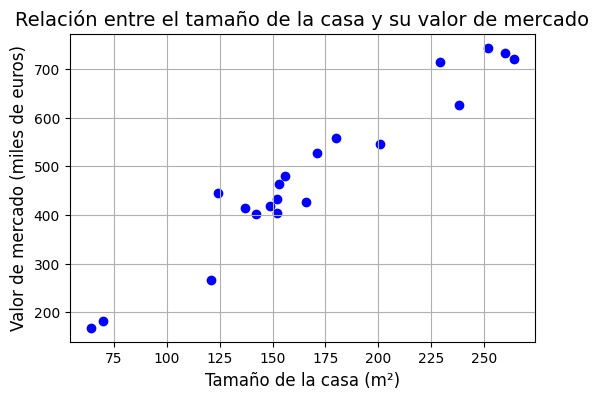

In [2]:
# Semilla para reproducibilidad
np.random.seed(42)

# Generar datos para el tamaño de las casas (en m2)
num_casas = 20
tamaño_casas = np.random.randint(50, 300, num_casas)  # Tamaño entre 50 y 300 m2

# Generar valores de mercado con una relación lineal + algo de ruido
valor_mercado = tamaño_casas * 3 + np.random.normal(0, 50, num_casas)  # Precio aproximado 3000€/m2

# Crear un array con las dos columnas (tamaño, valor) y ordenarlo por tamaño
casas = np.column_stack((tamaño_casas, valor_mercado.astype(int)))
casas_ordenadas = casas[casas[:, 0].argsort()]  # Ordenar por la primera columna (tamaño de las casas)

# Graficar los puntos (scatter plot)
plt.figure(figsize=(6, 4))
plt.scatter(casas_ordenadas[:, 0], casas_ordenadas[:, 1], color='blue', marker='o')

# Etiquetas y título
plt.title('Relación entre el tamaño de la casa y su valor de mercado', fontsize=14)
plt.xlabel('Tamaño de la casa (m²)', fontsize=12)
plt.ylabel('Valor de mercado (miles de euros)', fontsize=12)

plt.savefig('..\Imagenes\puntos.png')
# Mostrar la gráfica
plt.grid(True)
plt.show()


Estamos buscando la recta con expresión $\hat{y} = \theta_0 + \theta_1 x$ que mejor aproxima ese conjunto de datos.
Empecemos con un poco de notación. 

Partimos de un conjunto de m datos $\{ (x^j, y^j)\}_{j =1,\dots,m }$ donde $x^j$ es la característica conocida para el dato $j$, en nuestro caso el tamaño de la casa. Por su parte $y^j$ es el valor exacto asociado al dato $j$ que queremos aproximar (En nuestro ejemplo el precio de la casa). Lo vamos a diferenciar de $\hat{y}^j$ que es el valor aproximado que devuelve nuesto modelo y que podemos representar como una función:

$$ 
\hat{y}^j = h_\theta(x^j)=\theta_0 + \theta_1 x^j 
$$.

Si pensamos en término de matrices tenemos:
$$
X = \begin{pmatrix}
1 & x^1 \\
1 & x^2 \\
\vdots & \vdots \\
1 & x^m 
\end{pmatrix}
\hspace{0.5cm} 
\hat{Y} = 
\begin{pmatrix}
\hat{y}^1\\
\hat{y}^2\\
\vdots \\
\hat{y}^m
\end{pmatrix} 
\hspace{0.5cm} 
Y = 
\begin{pmatrix}
y^1\\
y^2\\
\vdots \\
y^m
\end{pmatrix} 
$$
Además podemos definir: $\Theta=\begin{pmatrix}
\theta_0\\
\theta_1
\end{pmatrix} $


Definimos el error cometido en cada aproximación como la diferencia entre el valor exacto $y^j$ y la predicción, el valor de $\hat{y}^j = h_\theta(x^j)$.

Para hablar del error total tenemos varias opciones:
* MAE: Error absoluto medio:
$$
J(\Theta) = \frac{1}{m}\sum_{j=1}^m |\hat{y}^j-y^j| = \sum_{j=1}^m |h_\theta(x^j)-y^j|
$$
* MSE: Error cuadrático medio:
$$
J(\Theta) = \frac{1}{m} \sum_{j=1}^m (\hat{y}^j-y^j)^2 = \sum_{j=1}^m (h_\theta(x^j)- y^j)^2
$$

En este caso vamos a elegir el MSE. La razón es que minimizar el error va a estar relacionado con derivar la función $J(\Theta)$ y el valor absoluto que involucra el MAE no es derivable lo que complicaría los cálculos.



<>:35: SyntaxWarning: invalid escape sequence '\I'
<>:35: SyntaxWarning: invalid escape sequence '\I'
C:\Users\javie\AppData\Local\Temp\ipykernel_12872\3236844797.py:35: SyntaxWarning: invalid escape sequence '\I'
  plt.savefig('..\Imagenes\errores.png')


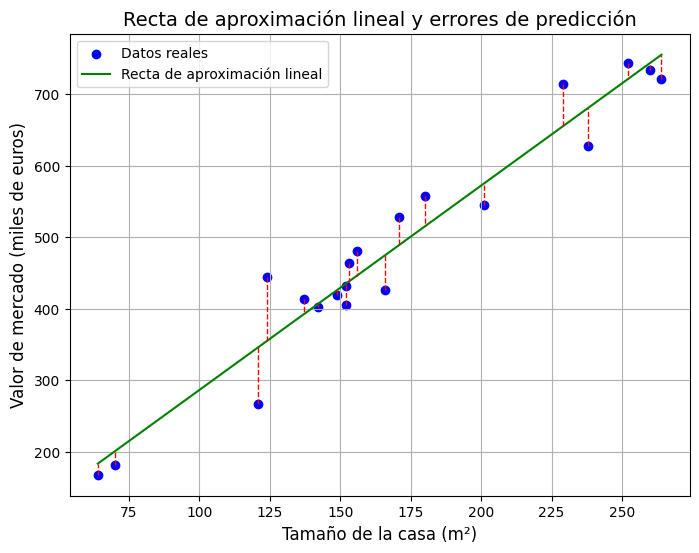

In [3]:
from sklearn.linear_model import LinearRegression

# Obtener las variables independientes y dependientes
X = casas_ordenadas[:, 0].reshape(-1, 1)  # Tamaños de casas (m²)
y = casas_ordenadas[:, 1]  # Valores de mercado (miles de euros)

# Crear un modelo de regresión lineal y ajustarlo a los datos
modelo = LinearRegression()
modelo.fit(X, y)

# Predicciones de la recta de regresión lineal
y_pred = modelo.predict(X)

# Crear la gráfica
plt.figure(figsize=(8, 6))

# Graficar los puntos reales (scatter plot)
plt.scatter(X, y, color='blue', marker='o', label='Datos reales')

# Graficar la recta de regresión
plt.plot(X, y_pred, color='green', label='Recta de aproximación lineal')

# Dibujar líneas verticales para mostrar los errores
for i in range(len(X)):
    plt.plot([X[i], X[i]], [y[i], y_pred[i]], color='red', linestyle='--', linewidth=1)

# Etiquetas y título
plt.title('Recta de aproximación lineal y errores de predicción', fontsize=14)
plt.xlabel('Tamaño de la casa (m²)', fontsize=12)
plt.ylabel('Valor de mercado (miles de euros)', fontsize=12)

# Leyenda
plt.legend()

plt.savefig('..\Imagenes\errores.png')
# Mostrar la gráfica
plt.grid(True)
plt.show()




Si enunciamos el problema que queremos resolver tenemos:

$$
\boxed{\text{Buscamos } \Theta = (\theta_0, \theta_1) \text{ tal que dados } \{ (x^j, y^j)\}^{j =1,\dots,m } \text{ minimicemos } J(\Theta) =   \frac{1}{m}\sum_{j=1}^m (h_\theta(x^j)-y^j)^2}
$$



A partir de aquí vamos a seguir dos enfoques.

### Cálculo Multivariable. 

Al ser la función de error $J(\Theta)$ una función convexa se verifica que el único punto crítico es el mínimo absoluto. Así para encontrarlo basta con encontrar $\Theta$ tal que el gradiente de la función de error se anule.
$$
\nabla_\Theta J = \vec{0}
$$

$$
J(\Theta) =  \frac{1}{m}\sum_{j=1}^m (h_\theta(x^j)-y^j)^2 =  \frac{1}{m}\sum_{j=1}^m ((\theta_0 + \theta_1 x^j)-y^j)^2 \longrightarrow
$$

$$
\left. \begin{array}{lcl} \dfrac{\partial}{\partial \theta_i}J(\Theta) = \dfrac{-2}{m} \displaystyle\sum_{j=1}^m ((\theta_0 + \theta_1 x^j)-y^j) & = & 0 
                        \\  & & \\
                        \dfrac{\partial}{\partial \theta_i}J(\Theta) = \dfrac{-2}{m} \displaystyle\sum_{j=1}^m ((\theta_0 + \theta_1 x^j)-y^j)x^j & = & 0 
        \end{array} \right\}
$$

$$
\left. \begin{array}{lcl}  \displaystyle\sum_{j=1}^m \theta_0 + \displaystyle\sum_{j=1}^m \theta_1 x^j - \displaystyle\sum_{j=1}^m y^j & = & 0 
                        \\  & & \\
                           \displaystyle\sum_{j=1}^m \theta_0x^j + \displaystyle\sum_{j=1}^m \theta_1 (x^j)^2 - \displaystyle\sum_{j=1}^m y^jx^j & = & 0  
        \end{array} \right\}
$$

$$
\left. \begin{array}{lcl}  \displaystyle\sum_{j=1}^m \theta_0 + \displaystyle\sum_{j=1}^m \theta_1 x^j & = & \displaystyle\sum_{j=1}^m y^j
                        \\  & & \\
                           \displaystyle\sum_{j=1}^m \theta_0x^j + \displaystyle\sum_{j=1}^m \theta_1 (x^j)^2 & = & \displaystyle\sum_{j=1}^m y^jx^j 
        \end{array} \right\}
$$

Que expresando en forma matricial:

$$
\begin{array}{ll}
\begin{pmatrix}
\displaystyle\sum_{j=1}^m  & \displaystyle\sum_{j=1}^m  x^j\\
\displaystyle\sum_{j=1}^m  x^j & \displaystyle\sum_{j=1}^m (x^j)^2
\end{pmatrix}
\begin{pmatrix}
\\
\theta_0 \\
\\
\theta_1 \\
\\
\end{pmatrix} 
& =
\begin{pmatrix}
\displaystyle\sum_{j=1}^m y^j \\
\displaystyle\sum_{j=1}^m y^jx^j 
\end{pmatrix}
\end{array}
$$

Recuerda que: 
$$
X = \begin{pmatrix}
1 & x^1 \\
1 & x^2 \\
\vdots & \vdots \\
1 & x^m 
\end{pmatrix}
\hspace{0.5cm} 
Y= 
\begin{pmatrix}
y^1\\
y^2\\
\vdots \\
y^m
\end{pmatrix} 
$$
Y por tanto:
$$
X^T = \begin{pmatrix}
1   & 1   & \dots & 1   \\
x^1 & x^2 & \dots & x^m
\end{pmatrix}
$$

Así que: 
$$
\begin{array}{ll}
\begin{pmatrix}
\displaystyle\sum_{j=1}^m  & \displaystyle\sum_{j=1}^m  x^j\\
\displaystyle\sum_{j=1}^m  x^j & \displaystyle\sum_{j=1}^m (x^j)^2
\end{pmatrix}
\begin{pmatrix}
\\
\theta_0 \\
\\
\theta_1 \\
\\
\end{pmatrix} 
=
\begin{pmatrix}
\displaystyle\sum_{j=1}^m y^j \\
\displaystyle\sum_{j=1}^m y^jx^j 
\end{pmatrix}
\end{array} \equiv (X^TX)\Theta = X^TY
$$

El problema de encontrar los coeficientes de la recta que mejor aproxima los datos se ha convertido en  resolver un sistema lineal $Ax= b$ con $A \in \cal{M}_{2\times2}(\cal{R})$ matriz simétrica. 

A la ecuación:
$$
\boxed{\Theta = (X^TX)^{-1} X^T Y}
$$
se la denomina ecuación normal y proporciona una solución exacta a la regresión lineal al minimizar directamente la función de error cuadrático medio.


### Álgebra Lineal. 

Pensemos matricialmente:
$$
Y = h_\Theta(X) = \begin{pmatrix}
1 & x^1 \\
1 & x^2 \\
\vdots & \vdots \\
1 & x^m 
\end{pmatrix}
\begin{pmatrix}
\\
\theta_0 \\
\\
\theta_1 \\
\\
\end{pmatrix} = X\Theta

$$

Estamos buscando $\Theta=\begin{pmatrix}
\theta_0 \\
\theta_1 
\end{pmatrix}$ que cumpla $X\Theta= Y$. Esto no es posible ya que no existe una recta que pase por todos los puntos. Así que buscamos el valor de $\Theta$ que hace que $X\Theta-Y$ sea lo menor posible.

Veamos:
Si llamamos $\vec{v}_1$ y $\vec{v}_2$ a las columnas de la matriz $X$:
$$
\vec{v}_1 = \begin{pmatrix}
1  \\
1  \\
\vdots \\
1 
\end{pmatrix}
; 
\vec{v}_2 =
\begin{pmatrix}
 x^1 \\
 x^2 \\
 \vdots \\
 x^m 
\end{pmatrix} 
$$

$$
X\Theta
=
\begin{pmatrix}
1 & x^1 \\
1 & x^2 \\
\vdots & \vdots \\
1 & x^m 
\end{pmatrix}
\begin{pmatrix}
\\
\theta_0 \\
\\
\theta_1 \\
\\
\end{pmatrix} 
= 
\theta_0\vec{v}_1 + \theta_0\vec{v}_1 = \cal{L}\{\vec{v}_1,\vec{v}_2\}
$$
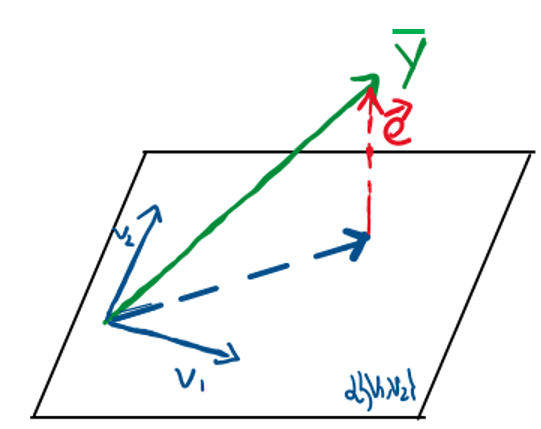

La combinación lineal $\theta_0\vec{v}_1 + \theta_0\vec{v}_1$ no nos va a permitir obtener vectores que estén fuera del espacio vectorial $\cal{L}\{\vec{v}_1,\vec{v}_2\}$.

Entonces el problema se puede describir como encontrar $\hat{Y} \in \cal{L}\{\vec{v}_1,\vec{v}_2\}$ de manera que el error, diferencia $\hat{Y} - Y$, sea lo menor posible. Pero ese es un problema cuya solución conocemos si pensamos en términos de *Álgebra Lineal*. 
Estamos buscando la proyección ortogonal de $Y$ en $\cal{L}\{\vec{v}_1,\vec{v}_2\}$.

Si definimos:
$$
\vec{e}= \hat{Y} - Y  =  ( X\Theta  - Y ) \perp \cal{L}\{\vec{v}_1,\vec{v}_2\} \Rightarrow
$$

$$
\Rightarrow \left. \begin{array}{lcl} \vec{e} & \perp & \vec{v}_1 
                        \\  & & \\
                        \vec{e} & \perp & \vec{v}_2
        \end{array} \right\}
\Rightarrow \left. \begin{array}{lcl} \vec{v}_1(X\Theta - Y )  & = & 0
                        \\  & & \\
                        \vec{v}_2(X\Theta - Y )  & = & 0
        \end{array} \right\}
$$
Como $\vec{v}_1$ y $\vec{v}_2$ son las columnas de la matriz $X$:
$$
\begin{pmatrix}
\dots  & \vec{v}_1 & \dots\\
\dots  & \vec{v}_2 & \dots
\end{pmatrix}
(X\Theta - Y )=X^T(X\Theta - Y )=\vec{0} \Rightarrow

$$

 
$$
\Rightarrow
\boxed{X^TX\Theta = X^TY}
$$

Hemos recuperado nuevamente la ecuación normal.



### Caso con varias variables predictoras.

Supongamos ahora que entre los datos de entrada tengo, no solo el tamaño de la casa, sino información sobre el número de habitaciones, baños, orientación, código postal, distancia al metro, jardín, número de planta,...

Ahora $\boldsymbol{x}^j = (x_1^j,x_2^j,x_3^j, \dots, x_n^j)$ siendo $x_i^j$ el valor de la característica $i$ del elemento (registro) $j$ de la muestra de datos.

El objetivo es, de nuevo, encontrar $\Theta = \begin{pmatrix}
\theta_0 \\
\theta_1 \\
\vdots\\
\theta_n
\end{pmatrix}$
tal que:

$$
\hat{y}^j = \theta_0 + \theta_1 x_1^j + \theta_2 x_2^j +\dots + + \theta_n x_n^j \sim y^j
$$

Dediquemos un rato a la notación para enunciar el problema formalmente:

Tenemos un conjunto de *m* datos (samples) cada uno de ellos con  *n* características (features) y un valor real (label). 
Para cada observación $ \boldsymbol{x}^j = (x^j_1, x^j_2, \dots ,x^j_n)$ tenemos asociada una salida (output) $y^j$. 
Buscamos una función que para cada dato nos permita hacer una estimación del valor de salida. Esa predicción va a ser de la forma:

$$ h_\Theta(\boldsymbol{x^j})= \theta_0 + \theta_1 x^j_1 + \theta_2 x^j_2 + \dots +\theta_n x^j_n $$

Para simplificar la notación vamos a redefinir el vector de datos de entrada de modo que $ \boldsymbol{x}^j = (x^j_0, x^j_1, x^j_2, \dots ,x^j_n) $, siendo $x^j_0 = 1, \forall j$, así:
$$ \hat{y}^j = h_\Theta(\boldsymbol{x^j})= \sum_{i=0}^n \theta_i x_i^j $$

Matricialmente:
$$
\boldsymbol{X} = \begin{pmatrix}
1 & x_1^1 & x_2^1 & \dots & x_n^1\\
1 & x_1^2 & x_2^2 & \dots & x_n^2\\
\vdots & \vdots &  & \dots & \vdots\\
1 & x_1^m & x_2^m & \dots & x_n^m
\end{pmatrix}
\hspace{1.0cm}
\boldsymbol{X} \in \cal{M}^{m\times(n+1)}(\mathbb{R})
$$
Puede resultar útil pensar en que cada fila es un registro. Es decir todas las características de un dato de entrada particular. La matriz tiene tantas filas como datos de entrada (registros, o muestras) y tantas columnas como características + 1, ya que añadimos una columna de 1's (En el futuro hablaremos de ese vector de 1's como el sesgo o bias).

$$
\Theta = \begin{pmatrix}
\theta_0 \\
\theta_1 \\
\vdots\\
\theta_n
\end{pmatrix}
\hspace{1.0cm}
Y = 
\begin{pmatrix}
y^1\\
y^2\\
\vdots \\
y^m
\end{pmatrix} 
$$
Y en cuanto a la aproximación lineal
$$
\hat{Y} = h_\Theta(\boldsymbol{X})=\boldsymbol{X}\Theta = 
\begin{pmatrix}
\displaystyle\sum_{i=0}^n \theta_i x_i^1\\
\displaystyle\sum_{i=0}^n \theta_i x_i^2\\
\vdots \\
\displaystyle\sum_{i=0}^n \theta_i x_i^m
\end{pmatrix}=
\begin{pmatrix}
\hat{y}^1\\
\hat{y}^2\\
\vdots \\
\hat{y}^m
\end{pmatrix} 
$$

Y la función de error a minimizar (MSE):
$$
J(\Theta) = \dfrac{1}{2} \displaystyle\sum_{j=1}^m (\boldsymbol{x}^j\Theta-y^j)^2 = \dfrac{1}{2} \displaystyle\sum_{j=1}^m (h_\Theta(\boldsymbol{x^j})-y^j)^2 = \dfrac{1}{2} \displaystyle\sum_{j=1}^m 
\left( \displaystyle\sum_{i=0}^n x_i^j\theta_i - y^j \right)^2
$$

Escribamos la función de error de forma matricial:
$$
h_\Theta(\boldsymbol{X})=\boldsymbol{X}\Theta = 
\begin{pmatrix}
h_\Theta(\boldsymbol{x^1})\\
h_\Theta(\boldsymbol{x^2})\\
\vdots \\
h_\Theta(\boldsymbol{x^m})
\end{pmatrix}=
\begin{pmatrix}
(\boldsymbol{x}^1)^T \Theta\\
(\boldsymbol{x}^2)^T \Theta\\
\vdots \\
(\boldsymbol{x}^m)^T \Theta
\end{pmatrix} 
$$

$$
\boldsymbol{X}\Theta -Y= 
\begin{pmatrix}
(\boldsymbol{x}^1)^T \Theta -y^1\\
(\boldsymbol{x}^2)^T \Theta -y^2\\
\vdots \\
(\boldsymbol{x}^m)^T \Theta -y^m
\end{pmatrix} 
$$
Entonces:
$$
(\boldsymbol{X}\Theta -Y)^T(\boldsymbol{X}\Theta -Y) = \displaystyle\sum_{j=1}^m(\boldsymbol{x}^j\Theta-y^j)^2 = \displaystyle\sum_{j=1}^m 
\left( \displaystyle\sum_{i=0}^n x_i^j\theta_i - y^j \right)^2$$

$$
\boxed{J(\Theta) = \dfrac{1}{2} (\boldsymbol{X}\Theta -Y)^T(\boldsymbol{X}\Theta -Y)}
$$



Minimizemos el error usando el gradiente
$$
\vec{0} = \nabla_\Theta J = \dfrac{1}{2} \nabla_\Theta(\boldsymbol{X}\Theta -Y)^T(\boldsymbol{X}\Theta -Y) = \dfrac{1}{2} \nabla_\Theta \left( \Theta^T\boldsymbol{X}^T\boldsymbol{X}\Theta -\Theta^T\boldsymbol{X}^TY - Y^T\boldsymbol{X}\Theta +Y^TY\right) =
$$ 

Como la expresión entre paréntesis es un número real (El error cuadrático medio) podemos sustituir por la traza:
$$
=\dfrac{1}{2} \nabla_\Theta \text{Traza} \left( \Theta^T\boldsymbol{X}^T\boldsymbol{X}\Theta -\Theta^T\boldsymbol{X}^TY - Y^T\boldsymbol{X}\Theta +Y^TY\right)=
$$

Ahora aplicamos que $ \text{Traza} (A+B) = \text{Traza} (A)+\text{Traza} (B)$:
$$
=\dfrac{1}{2} \nabla_\Theta\left(  \text{Traza} \left( \Theta^T\boldsymbol{X}^T\boldsymbol{X}\Theta\right) - \text{Traza} \left(\Theta^T\boldsymbol{X}^TY\right) - \text{Traza} \left(Y^T\boldsymbol{X}\Theta\right) + \text{Traza} \left(Y^TY\right) \right)=
$$
Como $ \text{Traza} (A) = \text{Traza} (A^T)$:
$$
=\dfrac{1}{2} \nabla_\Theta\left(  \text{Traza} \left( \Theta^T\boldsymbol{X}^T\boldsymbol{X}\Theta\right) - 2\text{Traza} \left(Y^T\boldsymbol{X}\Theta\right)  + \text{Traza} \left(Y^TY\right) \right)=
$$
$$
=\dfrac{1}{2} \left( \nabla_\Theta \text{Traza} \left( \Theta^T\boldsymbol{X}^T\boldsymbol{X}\Theta\right) - 2\nabla_\Theta\text{Traza} \left(Y^T\boldsymbol{X}\Theta\right)  + \nabla_\Theta \text{Traza} \left(Y^TY\right) \right)=
$$

$Y^TY$ no depende de $\Theta$, asi que:
$$
=\dfrac{1}{2} \left( \nabla_\Theta \text{Traza} \left( \Theta^T\boldsymbol{X}^T\boldsymbol{X}\Theta\right) - 2\nabla_\Theta\text{Traza} \left(Y^T\boldsymbol{X}\Theta\right)   \right)=
$$

Ahora vamos a aplicar dos propiedades del gradiente de la Traza que no demostraremos:
* $ \nabla_A \text{Traza}(AB) = B^T$ Esto se va a traducir en que $\nabla_\Theta\text{Traza} \left(Y^T\boldsymbol{X}\Theta\right) = \boldsymbol{X}^TY$
* $ \nabla_A \text{Traza}(ABA^TC) = B^TAC^T + BAC$ Si llamamos $A = \Theta$, $B = B^T= \boldsymbol{X}^T\boldsymbol{X}$ y $C = I$ tenemos que $\nabla_\Theta\text{Traza} \left(\Theta\boldsymbol{X}^T\boldsymbol{X}\Theta^T\right)=\boldsymbol{X}^T\boldsymbol{X}\Theta +\boldsymbol{X}^T\boldsymbol{X}\Theta$

$$
=\dfrac{1}{2} \left( \boldsymbol{X}^T\boldsymbol{X}\Theta + \boldsymbol{X}^T\boldsymbol{X}\Theta  - 2\boldsymbol{X}^TY\right)  =   \boldsymbol{X}^T\boldsymbol{X}\Theta  - \boldsymbol{X}^TY
$$

Y por tanto, al igualar $\vec{0} = \nabla_\Theta J$: 

$$
\boxed{\boldsymbol{X}^T\boldsymbol{X}\Theta  - \boldsymbol{X}^TY = 0}
$$

Nos volvemos a encontrar con la misma ecuación matricial.

La ecuación $\boldsymbol{X}^T\boldsymbol{X}\Theta  - \boldsymbol{X}^TY = 0$ se denomina ecuación normal y nos permite resolver el problema de encontrar los pesos $\Theta$ de la expresión lineal que minimiza el error cuadrático medio. 

## Ejemplos a resolver:
* ### Salarios:
  Problema con 1 variable predictora (Años de experiencia) y una a predecir (Salario)
      
* ### Caso sintético de Sklearn:
  Problema con 500 datos multivariables con 4 variables predictoras.

#### Importamos librería necesarias.

In [5]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import os

Empezaremos programando dos funciones:

* `normal_equations()`: A partir de los datos de entrada y las etiquetas calcula los coeficientes.
* `predicted()`: Una vez conocidos los coeficientes, devuelve la predicción dado un conjunto de datos de entrada. 

In [6]:
def normal_equation(X,y):
    """
    X: el conjunto de datos de entrada en la matriz X(m,n)
        m: número de datos. 
        n: número de variables predictoras o atributos.
    y: Vector columna con las imagenes de los datos de entrada conocidas. 

    Resuelvo la ecuación normal (X^T)X Theta = (X^T)Y
    Return Theta: vector de coeficientes de la regresión lineal
    """
    n_samples, n_features = X.shape

    # El primer paso será añadir la columna de 1's a los datos 
    # Puedes usar la funcion de numpy np.column_stack((v,M)) que añade v como columna de M a la izquierda

    #***** TU CODIGO AQUI ********* (1 línea)
    X_1 = np.column_stack((np.ones(n_samples),X))
    #***** TU CODIGO AQUI *********

    # Construye la matriz (X^T)X y el vector (X^T)Y donde X es la matriz amplida con la columna de 1's

    #***** TU CODIGO AQUI ********* (2 líneas)
    A = X_1.T@X_1
    B = X_1.T@y
    #***** TU CODIGO AQUI *********

    # Resuelve el sistema lineal (X^T)X Theta = (X^T)Y usando la función adecuada de numpy

    #***** TU CODIGO AQUI ********* (1 línea)
    Theta = np.linalg.solve(A,B)  
    #***** TU CODIGO AQUI *********  
     
    return Theta

def predicted(X, Theta):
    """
    X: el conjunto de datos de entrada en la matriz X(m,n)
        m: número de datos. 
        n: número de variables predictoras o atributos.
    Theta: vector de coeficientes Theta que devuelve la ecuación normal

    Return Y = X Theta
    """
    n_samples, n_features = X.shape
    # El primer paso será añadir la columna de 1's a los datos
    # Puedes usar la funcion de numpy np.column_stack((v,M)) que añade v como columna de M a la izquierda

    #***** TU CODIGO AQUI ********* (1 línea)
    X_1 = np.column_stack((np.ones(n_samples),X))
    #***** TU CODIGO AQUI *********

    # Calcula el vector de predicciones asociado a los datos de entrada Y=X Theta siendo X es la matriz amplida con la columna de 1's
    
    #***** TU CODIGO AQUI ********* (1 línea)
    Y = X_1@Theta
    #***** TU CODIGO AQUI *********
  
    return  Y

### Ejemplos a resolver:
* #### Salarios:
  Problema con 1 variable predictora (Años de experiencia) y una a predecir (Salario)
      
* #### Caso sintético de Sklearn:
  Problema con 500 datos multivariables con 4 variables predictoras.


#### 1. Salario vs Años de Experiencia

Datos de entrada:

In [ ]:
# Load data from a CSV file
datos = pd.read_csv('./Archivos/Salary_Data.csv')
datos.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<function matplotlib.pyplot.show(close=None, block=None)>

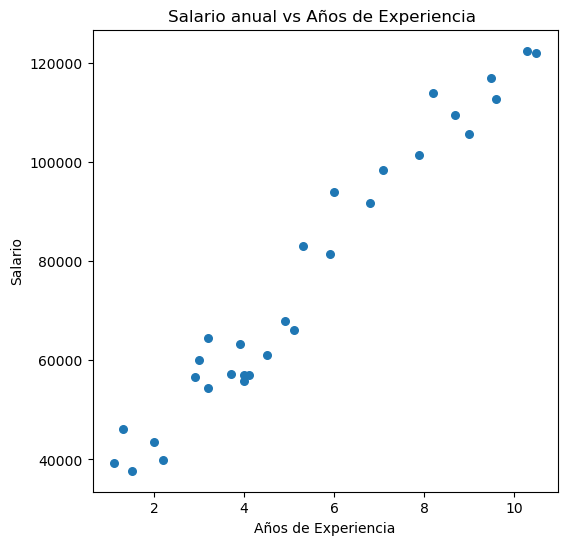

In [10]:
images_path = '.\Imagenes'
if not os.path.isdir(images_path):
    os.makedirs(images_path)
plt.figure(figsize=(6, 6))
plt.scatter(datos['YearsExperience'],datos['Salary'],s=30)
plt.xlabel('Años de Experiencia')  # Set the label for x-axis
plt.ylabel('Salario')  # Set the label for y-axis
plt.title('Salario anual vs Años de Experiencia ')  # Set the title of the plot
plt.savefig(os.path.join(images_path, "linear_regression_1"))
plt.show

A continuación vamos a ir paso a paso resolviendo el problema:

* Calculamos los coeficientes de la regresión lineal $\Theta$ llamando a la función `normal_equation()`

In [11]:
X = datos['YearsExperience'].values.reshape(-1,1) # Convierte la serie en un vector columna
y = datos['Salary'].values.reshape(-1,1)

#***** TU CODIGO AQUI ********* (1 línea)
Theta = normal_equation(X,y)
#***** TU CODIGO AQUI ********* 

print(Theta)

[[25792.20019867]
 [ 9449.96232146]]


*  Probamos el modelo en un vector que contiene 6 datos nuevos (años de experiencia). Para ello llamamos a la función `predicted()` 

In [12]:
X_test = np.random.uniform(0,12,(6,1))

#***** TU CODIGO AQUI ********* (1 línea)
Y_pred = predicted(X_test,Theta)
#***** TU CODIGO AQUI *********

print(Y_pred)

[[ 29880.63549708]
 [ 56196.90084938]
 [105321.75310138]
 [ 63273.90247083]
 [118222.71630273]
 [133962.78542053]]


* Predicción de salario para valores nuevos 

* Representamos gráficamente los puntos originales, los puntos de prueba y la recta de regresión calculada

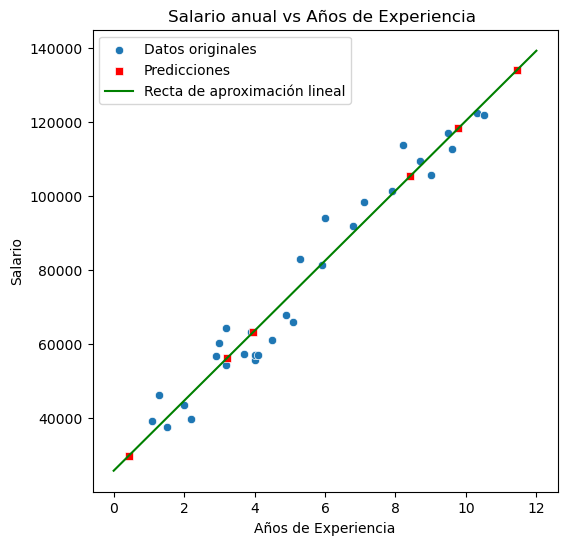

In [13]:

X_i = np.linspace(0,12,200).reshape((200,1))
plt.figure(figsize=(6,6))
# Puntos de entrenamiento
sns.scatterplot(x=datos['YearsExperience'],y=datos['Salary'], marker="o", label='Datos originales')
# Puntos de prueba
sns.scatterplot(x=X_test[:,0],y=Y_pred[:,0], color="r",marker="s", label='Predicciones')
# Recta de regresión
sns.lineplot(x=X_i[:,0], y=predicted(X_i, Theta)[:,0], color='green', label='Recta de aproximación lineal')
plt.xlabel('Años de Experiencia')  # Set the label for x-axis
plt.ylabel('Salario')  # Set the label for y-axis
plt.title('Salario anual vs Años de Experiencia ')  # Set the title of the plot
plt.savefig(os.path.join(images_path, "linear_regression_2"))
plt.show()

#### 2. Caso SKlearn

En la libreria `Scikit-Learn` existen funciones para generar conjuntos de datos de forma artificial que utilizar para validar nuestros modelos.
Vamos a empezar con un caso de regresión lineal con 500 datos cada uno de ellos con 4 variables de entrada.

* Cómo interpretar el parámetro `noise=20`:
Noise añade ruido gaussiano a las salidas del modelo lineal generado. En este caso, el ruido sigue una distribución normal con una desviación estándar de 20.
Esto significa que, en promedio, los valores de y generados estarán desviados por alrededor de 20 unidades respecto a la verdadera relación lineal subyacente.

* MSE esperado
Un MSE esperable debería estar aproximadamente alrededor de la varianza del ruido introducido. Dado que especificaste noise=20, la varianza del ruido sería $20^2=400$. Esto te da una referencia de cuál sería el MSE mínimo esperable, ya que el modelo lineal tratará de capturar la relación subyacente, pero no podrá reducir el error por debajo del nivel de ruido introducido.

In [14]:
X, y = datasets.make_regression(n_samples=500, n_features=4, noise=20, random_state=4)

n_samples, n_features = np.shape(X)

### División en Train/test

Lo primero que haremos será dividir el conjunto de datos de entrada en dos subconjuntos. Uno que llamaremos `Train` lo usaremos para crear el modelo lineal. El resto de datos de entrada formarán el `Test`, desconocido para el modelo, que emplearemos para ver como de bien aproxima el modelo.

In [15]:
n_train = int(0.8*n_samples)
order = list(range(n_samples))
np.random.shuffle(order)

X_shuffle = X[order,:]
y_shuffle = y[order]

X_train = X_shuffle[:n_train, :]
y_train = y_shuffle[:n_train] 

X_test  = X_shuffle[n_train:, :]
y_test  = y_shuffle[n_train:]

A continuación vamos a ir paso a paso resolviendo el problema:

* Calculamos los coeficientes de la regresión lineal $\Theta$ llamando a la función `normal_equation()` sobre el conjunto de datos de entrenamiento.

In [16]:

#***** TU CODIGO AQUI ********* (1 línea)
Theta = normal_equation(X_train,y_train)
#***** TU CODIGO AQUI ********* 

print(Theta)

[ 0.26203108 52.34050469 92.61724095  6.63297508 84.17923021]


*  Probamos el modelo en los datos de test. Para ello llamamos a la función `predicted()` 

In [17]:
#***** TU CODIGO AQUI ********* (1 línea)
y_pred = predicted(X_test,Theta)
#***** TU CODIGO AQUI ********* 

* Calculamos el MSE cometido en el conjunto de datos de test. Para ello implementa:
$$
J(\Theta) = \frac{1}{m} \sum_{j=1}^m (\hat{y}^j-y^j)^2 
$$
Intenta vectorizar la operación lo más posible. `y_pred` e `y_test` son vectores de la misma longitud. Puedes operar elemento a elemento para calcular $(Y^j-y^j)^2 $ y sumar las componentes del vector resultado.

In [18]:
# Calculo del error


#***** TU CODIGO AQUI ********* (1 línea)
mse_test = sum((y_pred-y_test)**2)/(n_samples-n_train)
#***** TU CODIGO AQUI ********* 

print(mse_test)

443.1520873773521


* Por último representamos graficamente las predicciones frente a los valores reales. El error en cada dato es lo que se desvía de la diagonal.

<function matplotlib.pyplot.show(close=None, block=None)>

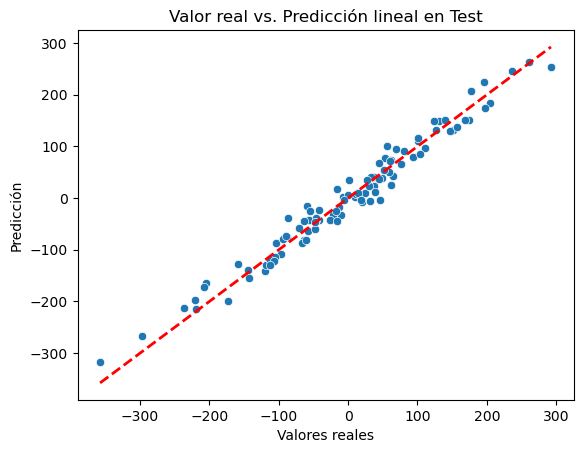

In [19]:
sns.scatterplot(x=y_test,y=y_pred)
min_val = min(y_test.min(), y_pred.min())  # Valor mínimo para la diagonal
max_val = max(y_test.max(), y_pred.max())  # Valor máximo para la diagonal
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label="Línea ideal (y=x)")
plt.xlabel('Valores reales')
plt.ylabel('Predicción')
plt.title('Valor real vs. Predicción lineal en Test')
plt.savefig(os.path.join(images_path, "linear_regression_3"))
plt.show